# Assignment 3

Assignment Completed by Darshan Panesar

You only need to write one line of code for each question. When answering questions that ask you to identify or interpret something, the length of your response doesn’t matter. For example, if the answer is just ‘yes,’ ‘no,’ or a number, you can just give that answer without adding anything else.

We will go through comparable code and concepts in the live learning session. If you run into trouble, start by using the help `help()` function in Python, to get information about the datasets and function in question. The internet is also a great resource when coding (though note that **no outside searches are required by the assignment!**). If you do incorporate code from the internet, please cite the source within your code (providing a URL is sufficient).

Please bring questions that you cannot work out on your own to office hours, work periods or share with your peers on Slack. We will work with you through the issue.

### Clustering and Resampling

Let's set up our workspace and use the **Wine dataset** from `scikit-learn`. This dataset is a classic dataset used for clustering tasks. It consists of many samples of wine. Here are the key features and characteristics of the dataset:

##### Features (13 chemical properties):
1. Alcohol: The percentage of alcohol in the wine.
2. Malic acid: A type of acid found in grapes, contributing to wine’s tartness.
3. Ash: The total amount of non-volatile substances left after burning the wine
4. Alcalinity of ash: Measures the alkalinity of the ash component of wine.
5. Magnesium: The amount of magnesium in the wine (measured in mg/L).
6. Total phenols: Represents the total amount of phenolic compounds in wine.
7. Flavanoids: A type of phenolic compound responsible for bitterness and astringency.
8. Nonflavanoid phenols: Phenolic compounds that are not flavonoids.
9. Proanthocyanins: A type of tannin that affects astringency and bitterness.
10. Color intensity: Measures the depth or intensity of the wine’s color. 
11. Hue: The shade of color in the wine (ratio of red to yellow tones).
12. OD280/OD315 of diluted wines: Measures the wine’s absorbance at 280 nm and 315 nm, indicating phenol concentration.
13. Proline: An amino acid found in wine, often associated with aging potential and quality.

In [3]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


#### **Question 1:** 
#### Data inspection

#### Load the Wine dataset:

Use scikit-learn to load the Wine dataset and convert it into a Pandas DataFrame.
Display the first few rows of the dataset. How many observations (rows) and features (columns) does the dataset contain?

In [4]:
from sklearn.datasets import load_wine
# Load the Wine dataset
wine_data = load_wine()

# Convert to DataFrame
wine_df = pd.DataFrame(wine_data.data, columns=wine_data.feature_names)

# Display the DataFrame
print(wine_df)

# to print first few rows .head() function used
wine_df.head()

# To get informaiton about obersvations and features either the print(wine_df) can be used which displays information at the bottom about rows and col.
    #In this case it mentions [178 rows x 13 columns]

#Alternatively we can also use wine_df.info() to get a summary

#wine_df.info()
    #In this case it mentions: 178 entries, 0 to 177 (rows) and again 13 columns


     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

#### **Question 2:** 
#### Data-visualization

Let's create plots to visualize the relationships between the features (e.g., alcohol, malic acid, ash...).


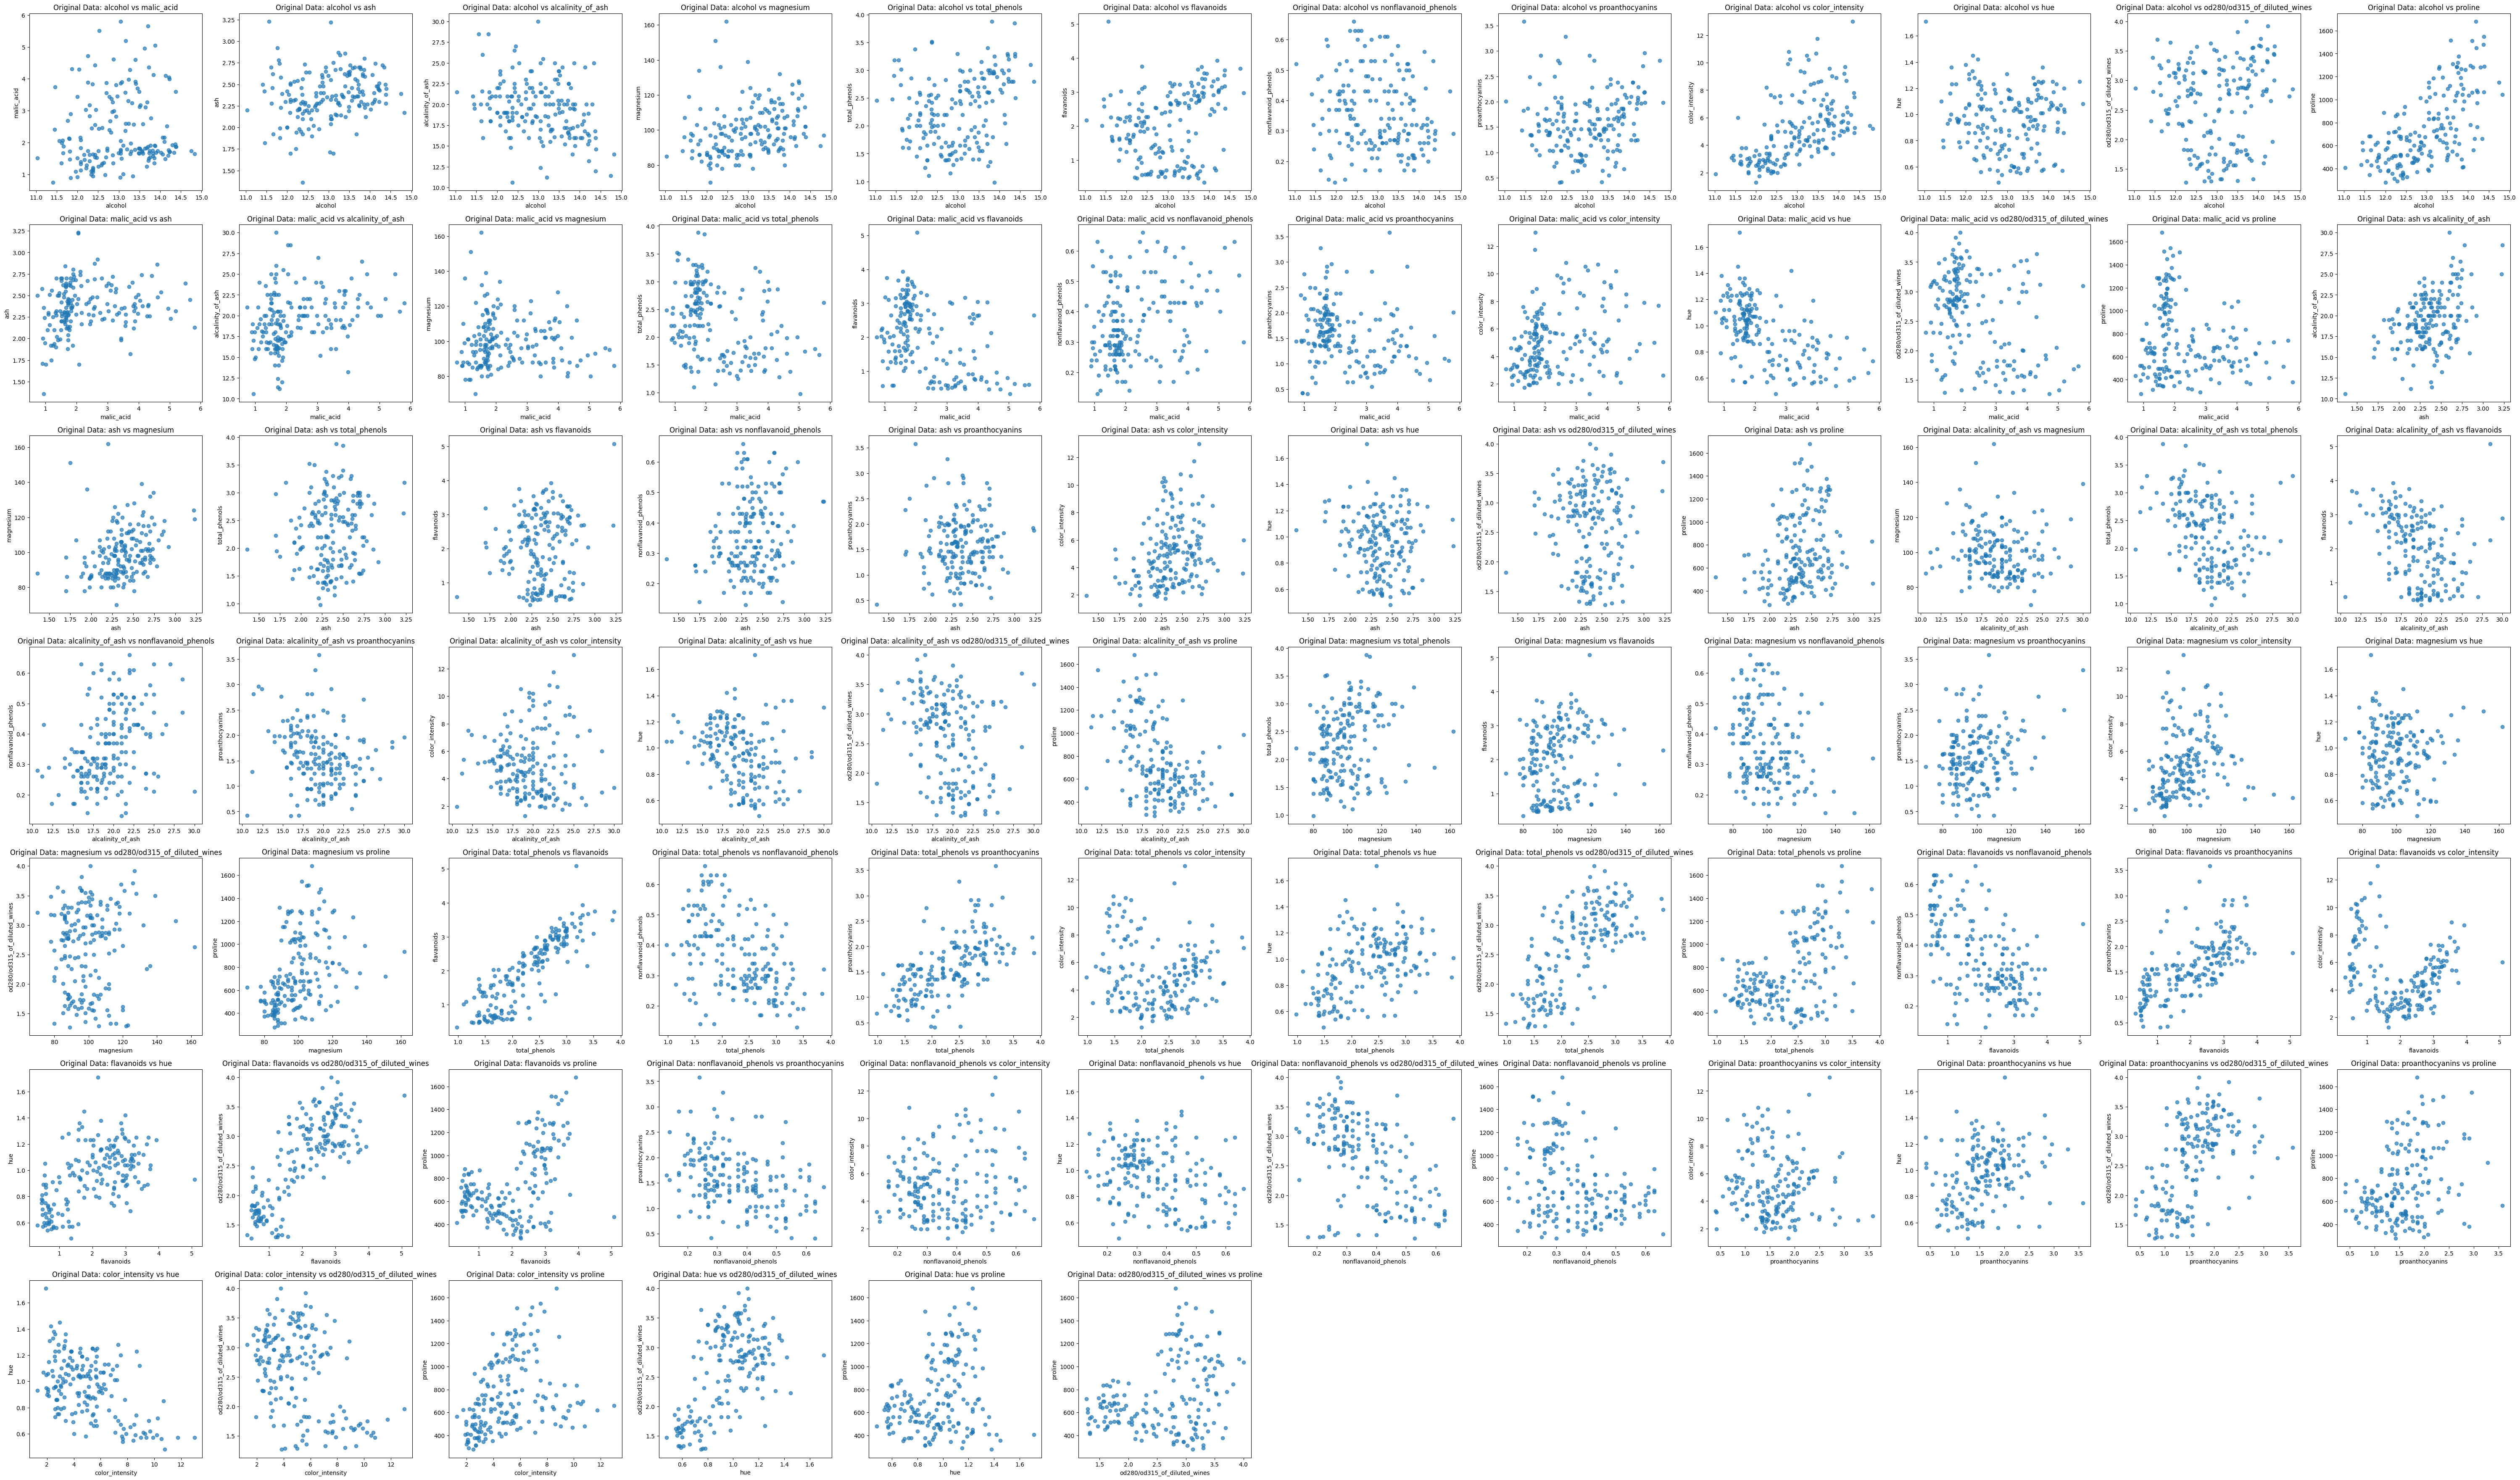

In [5]:
def plot_feature_pairs(data, feature_names, color_labels=None, title_prefix=''):
    """
    Helper function to create scatter plots for all possible pairs of features.
    
    Parameters:
    - data: DataFrame containing the features to be plotted.
    - feature_names: List of feature names to be used in plotting.
    - color_labels: Optional. Cluster or class labels to color the scatter plots.
    - title_prefix: Optional. Prefix for plot titles to distinguish between different sets of plots.
    """
    # Create a figure for the scatter plots
    plt.figure(figsize=(60, 60))
    
    # Counter for subplot index
    plot_number = 1
    
    # Loop through each pair of features
    for i in range(len(feature_names)):
        for j in range(i + 1, len(feature_names)):
            plt.subplot(len(feature_names)-1, len(feature_names)-1, plot_number)
            
            # Scatter plot colored by labels if provided
            if color_labels is not None:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], 
                            c=color_labels, cmap='viridis', alpha=0.7)
            else:
                plt.scatter(data[feature_names[i]], data[feature_names[j]], alpha=0.7)
            
            plt.xlabel(feature_names[i])
            plt.ylabel(feature_names[j])
            plt.title(f'{title_prefix}{feature_names[i]} vs {feature_names[j]}')
            
            # Increment the plot number
            plot_number += 1

    # Adjust layout to prevent overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# Get feature names
feature_names = wine_df.columns

# Use the helper function to plot scatter plots without coloring by cluster labels
plot_feature_pairs(wine_df, feature_names, title_prefix='Original Data: ')

**Question:**
- Do you notice any patterns or relationships between the different features? How might these patterns help in distinguishing between different species?

> Several of the plots show patterns and relationships here are some examples:
    >1. alcalinity_of_ash & od280/od315_of_diluted_wines appears to have 2 distinct groups a. medium alcalinity and high od280/od315 b. medium alcalinity and low od280/od315
    >2. across the board malic acid seems to have a relationship with other variables (e.g., ash, hue, colour intensity, etc) except alcohol where low malic acid level is shows cluster grouping with other variables in varying degrees (mostly at middle levels) 
    >3. similar to alcalinity of ash, total phenols also appears to have 2 distinct clusters with both od280/od315_of_diluted_wines (fairly distinct; low and low or high od280/od315 and medium levels of total phenols) and to a lesser extent proline. 
    >4. Total phenols appears to have a linear positive strong relationship with flavenoids
    >5. Some variables do not appear to have visually distinct cluster groupings or relationships for example: nonflavanoid_phenols & proanthocyanins in which the data points are spread out across the entire range

> These patterns may help us identify which variables of wine can help us categorize wines and how to do so. For example wines grouped closely togeather for total phenols may be of similar species/variety due to their grouping on distinct features. 


#### **Question 3:** 
#### Data cleaning

In [6]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset
scaled_features = scaler.fit_transform(wine_df)

# Create a new DataFrame with scaled features
scaled_wine_df = pd.DataFrame(scaled_features, columns=wine_data.feature_names)

# Display the first few rows of the scaled DataFrame
print(scaled_wine_df.head())

    alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
0  1.518613   -0.562250  0.232053          -1.169593   1.913905   
1  0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2  0.196879    0.021231  1.109334          -0.268738   0.088358   
3  1.691550   -0.346811  0.487926          -0.809251   0.930918   
4  0.295700    0.227694  1.840403           0.451946   1.281985   

   total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
0       0.808997    1.034819             -0.659563         1.224884   
1       0.568648    0.733629             -0.820719        -0.544721   
2       0.808997    1.215533             -0.498407         2.135968   
3       2.491446    1.466525             -0.981875         1.032155   
4       0.808997    0.663351              0.226796         0.401404   

   color_intensity       hue  od280/od315_of_diluted_wines   proline  
0         0.251717  0.362177                      1.847920  1.013009  
1        -0.293321  0.406051

Why is it important to standardize the features of a dataset before applying clustering algorithms like K-Means? Discuss the implications of using unstandardized data in your analysis.

>Ideally we want all of our predictor variables to be on the same scale (normalized) similar to what we did for the KNN-classifier models. Standardizaion transforms continous data to fit a mean of 0 and a sd of 1 which is useful for distance based stats (Euclidean distance). Different scales can cause issues with ML models especially those that utilize distance. By using unstandardized data we cannot compare distances or different plots etc. 

#### **Question 4:** 
#### K-means clustering 

Apply the K-Means clustering algorithm to the Wine dataset. Choose the value 3 for the number of clusters (`k=3`) and fit the model. Assign cluster labels to the original data and add them as a new column in the DataFrame.

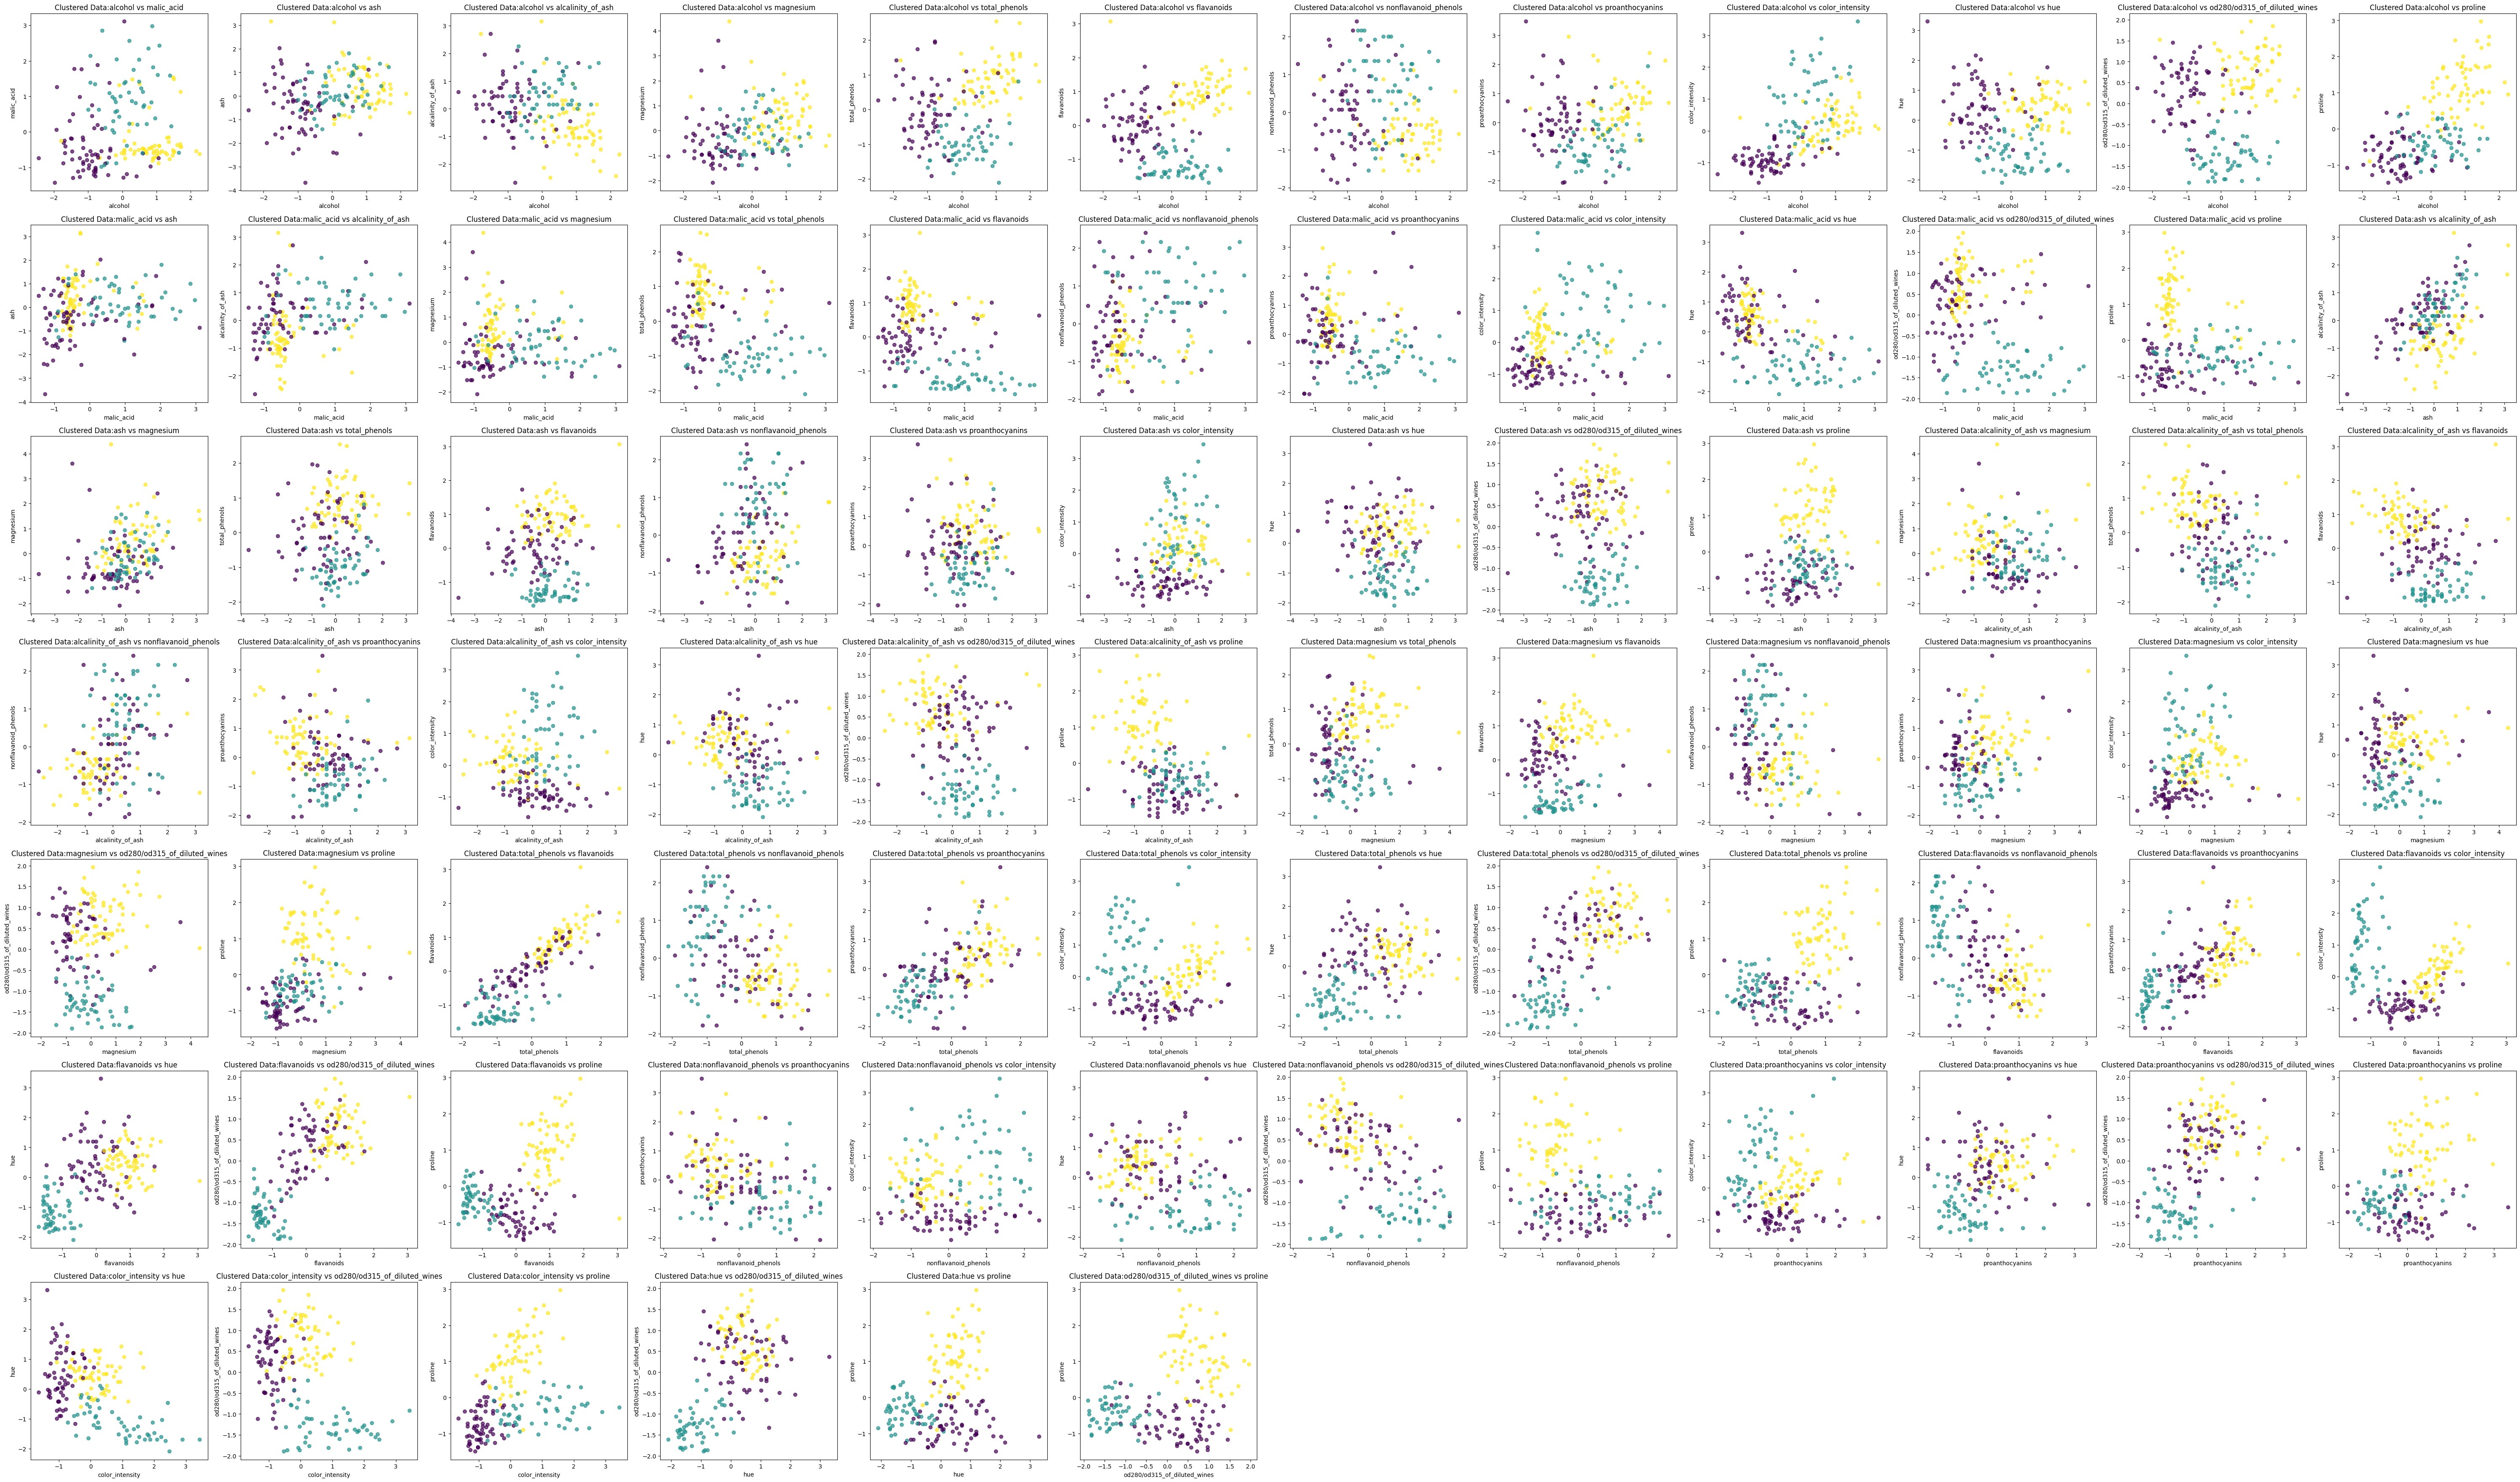

In [9]:
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit(scaled_features)

clustered_wine_data = scaled_wine_df.copy()

# Add cluster labels to the scaled DataFrame
scaled_wine_df['Cluster'] = clusters.labels_

# Use the helper function to plot scatter plots, colored by cluster labels
plot_feature_pairs(clustered_wine_data, feature_names, color_labels=clustered_wine_data['Cluster'], title_prefix='Clustered Data:')

We chose `k=3` for the number of clusters arbitrarily. However, in a real-world scenario, it is important to determine the optimal number of clusters using appropriate methods.

**Question**: What is one method commonly used to determine the optimal number of clusters in K-means clustering, and why is this method helpful?

> We can plot out the total WSSD results from a range of k values then find the elbow i.e., the point of inflection at which value of total WSSD as a specific K is low and the following values of total WSSD at the next K values do not change by a large margin (i.e., become asymptotic). 

#### **Question 5:** 
#### Bootstrapping 

Implement bootstrapping on the mean of `color intensity`. Generate 10000 bootstrap samples, calculate the mean for each sample, and compute a 90% confidence interval.

In [10]:
np.random.seed(123)

mean_color_intensity = wine_df['color_intensity'].mean()

bootstrap_samples = []

for i in range(10000):
    sample = wine_df.sample(frac=1, replace=True)  # Take a sample from the dataset with replacement (bootstrap) -> sampling from entire dataset entire row
    sample_mean = sample['color_intensity'].mean()
    sample = sample.assign(replicate=i)  # Add replicate number to identify each bootstrap sample
    bootstrap_samples.append(sample)  # Store the sample in the list created prior



# Combine all bootstrap samples into one DataFrame
boot10000 = pd.concat(bootstrap_samples)

# Calculate the mean price for each bootstrap sample (replicate)
boot_means = boot10000.groupby('replicate')['color_intensity'].mean().reset_index(name='mean_colour_intensity')



lower_bound = boot_means['mean_colour_intensity'].quantile([0.05])
upper_bound = boot_means['mean_colour_intensity'].quantile([0.95])

# Display the result
print(f"Mean of Color Intensity: {mean_color_intensity}")
print(f"90% Confidence Interval of Mean Color Intensity: ({lower_bound}, {upper_bound})")



Mean of Color Intensity: 5.058089882022472
90% Confidence Interval of Mean Color Intensity: (0.05    4.778817
Name: mean_colour_intensity, dtype: float64, 0.95    5.34502
Name: mean_colour_intensity, dtype: float64)


**Question:**
- Why do we use bootstrapping in this context? What does it help us understand about the mean?

> Generally we use bootstrapping when we would like to estimate the sampling distribution in context to the full population when we only have access to one small sample subset of that population. In additon, we do this when we have no assumptions about the distribution (i.e., we dont know the distribution and if it normal). Therefore we take many small samples from our total sample and this lets us make estimates about the mean accross the whole population.

> In this context we are evaluating the mean colour intensity of wine. We are examining how the average colour intensity of wine would vary if we had multiple samples from the wine dataset (how consistent the mean colour intensity is). It will also give us an estimate of whether the colour intensity would vary if were were to take a completely new sample different from the wine dataset. Further it gives us an estimate of whether our estimate of the mean reflects the mean colour intensity across the entire population (based on our sample alone).

**Question:**
- What is the purpose of calculating the confidence interval from the bootstrap samples? How does it help us interpret the variability of the estimate?

> Our confidence interval tells us how much our mean varies (from our sample) and if it is representative of the true mean colour intensity of the population of wines. We have 2 limits upper and lower which tell us the lowest and highest estimate of the mean based on our sample. If our calculated bootstrap mean falls within this limit it means that our estimate of the mean is less variable and more along the lines of the true mean. While if it is far from the CI limits i.e., falls outside it means that our estimate of the mean is more variable, not stable, and not representative of the true mean (mean across the entire population).

**Question:**

- Reflect on the variability observed in the bootstrapped means and discuss whether the mean of the color intensity appears to be a stable and reliable estimate based on the confidence interval and the spread of the bootstrapped means.

> The mean colour intensity appears to be stable and reliable estimate for the following reasons:
    > The confidence intervals are [4.778817, 5.34502] which are realtively narrow which is a good sign that there isn't a lot of variability in my sample means i.e., my bootstrapped mean colour intensity is relatively stable across multiple sample means.
    > Second my bootstrapped mean colour intensity is 5.058089882022472 which fall perfectly within the CI's indicating its stable, consistent, and a realtively precise estimate of the population or true mean colour intensity of wine.

# Criteria


| **Criteria**                                           | **Complete**                                      | **Incomplete**                                    |
|--------------------------------------------------------|---------------------------------------------------|--------------------------------------------------|
| **Data Inspection**                                    | Data is thoroughly inspected for the number of variables, observations, and data types, and relevant insights are noted. | Data inspection is missing or lacks detail.         |
| **Data Visualization**                                 | Visualizations (e.g., scatter plots) are correctly interpreted to explore relationships between features and species. | Visualizations are not correctly interpreted. |
| **Clustering Implementation**                           | K-Means clustering is correctly implemented, and cluster labels are appropriately assigned to the dataset.            | K-Means clustering is missing or incorrectly implemented. |
| **Bootstrapping Process**                              | Bootstrapping is correctly performed, and results are used to assess variable mean stability. | Bootstrapping is missing or incorrectly performed. |

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Note:

If you like, you may collaborate with others in the cohort. If you choose to do so, please indicate with whom you have worked with in your pull request by tagging their GitHub username. Separate submissions are required.

### Submission Parameters:
* Submission Due Date: `11:59 PM - 03/28/2025`
* The branch name for your repo should be: `assignment-3`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_3.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/LCR/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [x] Created a branch with the correct naming convention.
- [x] Ensured that the repository is public.
- [x] Reviewed the PR description guidelines and adhered to them.
- [x] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#dc-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.
